In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [54]:
X, y = load_breast_cancer(return_X_y=True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [56]:
def k_fold_validation(X, y, classifier, param_range, folds):

  kf = KFold(n_splits=folds)

  X_train = pd.DataFrame(X)
  y_train = pd.DataFrame(y)

  train_scores = []
  test_scores = []

  for p in param_range:
    training_scores = []
    crossval_scores = []

    classifier.n_neighbors = int(p)

    for i, (index_train, index_test) in enumerate(kf.split(X_train)):
      x_training = X_train.iloc[index_train]
      x_cv = X_train.iloc[index_test]

      y_training = y_train.iloc[index_train]
      y_cv = y_train.iloc[index_test]

      model = classifier.fit(x_training, np.ravel(y_training))
      training_scores.append(model.score(x_training, y_training))
      crossval_scores.append(model.score(x_cv, y_cv))

    train_scores.append(np.mean(training_scores))
    test_scores.append(np.mean(crossval_scores))
    
  return (train_scores, test_scores)

0.948901098901099 0.9263736263736263


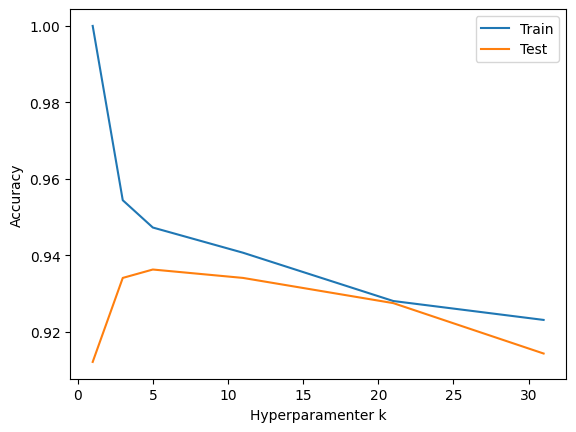

In [57]:
classifier = KNeighborsClassifier()
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
k_neighbors = [1,3,5,11,21,31]

train_score, cv_scores = k_fold_validation(X_train, y_train, classifier, k_neighbors, 5)

print(np.mean(train_score), np.mean(cv_scores))
plt.plot(k_neighbors, train_score, label="Train")
plt.plot(k_neighbors, cv_scores, label="Test")
plt.xlabel("Hyperparamenter k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
def k_fold_validation_tree(X, y, param_range, folds):

  kf = KFold(n_splits=folds)

  X_train = pd.DataFrame(X)
  y_train = pd.DataFrame(y)

  train_scores = []
  test_scores = []

  for p in param_range:
    training_scores = []
    crossval_scores = []

    for depth in range(10, 110, 10):
      classifier = DecisionTreeClassifier(max_depth=depth, criterion=p)

      for i, (index_train, index_test) in enumerate(kf.split(X_train)):
        x_training = X_train.iloc[index_train]
        x_cv = X_train.iloc[index_test]

        y_training = y_train.iloc[index_train]
        y_cv = y_train.iloc[index_test]

        model = classifier.fit(x_training, np.ravel(y_training))
        training_scores.append(model.score(x_training, y_training))
        crossval_scores.append(model.score(x_cv, y_cv))
    train_scores.append(np.mean(training_scores))
    test_scores.append(np.mean(crossval_scores))
    
  return (train_scores, test_scores)

1.0 0.9267399267399267


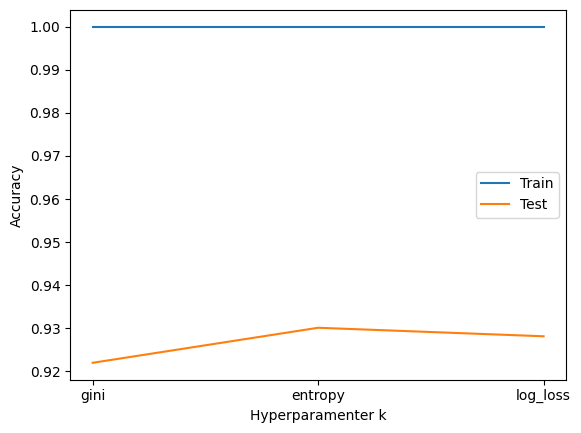

In [59]:
decision_tree_params = ["gini", "entropy", "log_loss"]

train_score, cv_scores = k_fold_validation_tree(X_train, y_train, decision_tree_params, 5)

print(np.mean(train_score), np.mean(cv_scores))

plt.plot(decision_tree_params, train_score, label="Train")
plt.plot(decision_tree_params, cv_scores, label="Test")
plt.xlabel("Hyperparamenter k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()